# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
!pip install citipy
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#print(weather_api_key)

c1f8272327495723e6d0914d9e41b010


## Generate Cities List

In [27]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

In [30]:
print(cities)

['hilo', 'saint-georges', 'butaritari', 'mount isa', 'tasiilaq', 'saskylakh', 'cherdyn', 'samusu', 'vieksniai', 'puerto ayora', 'dikson', 'norman wells', 'karaul', 'pevek', 'avarua', 'barrow', 'new norfolk', 'bluff', 'fortuna', 'rikitea', 'port alfred', 'nikolskoye', 'east london', 'cherskiy', 'carnarvon', 'puerto colombia', 'hobart', 'ponta do sol', 'ozernovskiy', 'luba', 'khatanga', 'la ronge', 'punta arenas', 'belushya guba', 'utiroa', 'chokurdakh', 'mehamn', 'mahebourg', 'fare', 'jamestown', 'cape town', 'sept-iles', 'pisco', 'pangody', 'faanui', 'marshall', 'ushuaia', 'hofn', 'kashi', 'sao filipe', 'esperance', 'mackenzie', 'mataura', 'eureka', 'poopo', 'mugumu', 'chuy', 'yumen', 'wau', 'karatuzskoye', 'sinegorsk', 'tautira', 'kautokeino', 'taolanaro', 'albany', 'coos bay', 'mogok', 'busselton', 'port hardy', 'ornskoldsvik', 'kaitangata', 'eyl', 'anda', 'illoqqortoormiut', 'upernavik', 'salinopolis', 'komsomolskiy', 'alakurtti', 'asau', 'cidreira', 'ravar', 'thompson', 'neiafu', '

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [28]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={weather_api_key}&units={units}&q="
#print(query_url + "Detroit")

In [41]:
#Create lists to hold data needed
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

set_count = 1
record_count = 1

#print statements to begin print log
print("Beginning Data Retrieval")
print("------------------------------------")

#Used enumerate() to count each city in order to print 
for i, city in enumerate(cities):
    
    #Group cites in to sets of 50
    if i % 50 == 0 and i >= 50:
        set_count = set_count + 1
        record_count = 1
    
    #print logs print statement    
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    
    record_count = record_count + 1
   
    #Used try/except to skip any city that has bad data
    try:
        response =requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city_name.append(city)
    
    except KeyError:
        print("City not found. Skipping...")
        
#Print statements to show that the data pull is completed in the print log
print("------------------------------------")
print("Data Retrieval Complete")
print("------------------------------------")

Beginning Data Retrieval
------------------------------------
Processing Record 1 of Set 1 | hilo
Processing Record 2 of Set 1 | saint-georges
Processing Record 3 of Set 1 | butaritari
Processing Record 4 of Set 1 | mount isa
Processing Record 5 of Set 1 | tasiilaq
Processing Record 6 of Set 1 | saskylakh
Processing Record 7 of Set 1 | cherdyn
Processing Record 8 of Set 1 | samusu
City not found. Skipping...
Processing Record 9 of Set 1 | vieksniai
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | dikson
Processing Record 12 of Set 1 | norman wells
Processing Record 13 of Set 1 | karaul
City not found. Skipping...
Processing Record 14 of Set 1 | pevek
Processing Record 15 of Set 1 | avarua
Processing Record 16 of Set 1 | barrow
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | fortuna
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | port alfred
Processing Record 22 of Set 1

Processing Record 41 of Set 4 | bolshaya irba
City not found. Skipping...
Processing Record 42 of Set 4 | hanstholm
Processing Record 43 of Set 4 | kotido
Processing Record 44 of Set 4 | richards bay
Processing Record 45 of Set 4 | ngukurr
City not found. Skipping...
Processing Record 46 of Set 4 | jumla
Processing Record 47 of Set 4 | maniitsoq
Processing Record 48 of Set 4 | mnogovershinnyy
Processing Record 49 of Set 4 | juegang
Processing Record 50 of Set 4 | ribeira grande
Processing Record 1 of Set 5 | tuktoyaktuk
Processing Record 2 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 3 of Set 5 | olafsvik
Processing Record 4 of Set 5 | abu dhabi
Processing Record 5 of Set 5 | porosozero
Processing Record 6 of Set 5 | kamina
Processing Record 7 of Set 5 | dingle
Processing Record 8 of Set 5 | arraial do cabo
Processing Record 9 of Set 5 | manggar
Processing Record 10 of Set 5 | grand gaube
Processing Record 11 of Set 5 | talnakh
Processing Record 12 of Set 5 | w

Processing Record 34 of Set 8 | pauini
Processing Record 35 of Set 8 | ilave
Processing Record 36 of Set 8 | ugoofaaru
Processing Record 37 of Set 8 | tumaco
Processing Record 38 of Set 8 | solnechnyy
Processing Record 39 of Set 8 | kozan
Processing Record 40 of Set 8 | havre-saint-pierre
Processing Record 41 of Set 8 | porto novo
Processing Record 42 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 43 of Set 8 | samana
Processing Record 44 of Set 8 | vestmanna
Processing Record 45 of Set 8 | kedrovyy
Processing Record 46 of Set 8 | namtsy
Processing Record 47 of Set 8 | muli
Processing Record 48 of Set 8 | karlskrona
Processing Record 49 of Set 8 | seymchan
Processing Record 50 of Set 8 | yar-sale
Processing Record 1 of Set 9 | zeya
Processing Record 2 of Set 9 | whitehorse
Processing Record 3 of Set 9 | nhulunbuy
Processing Record 4 of Set 9 | malanje
Processing Record 5 of Set 9 | luebo
Processing Record 6 of Set 9 | bluffton
Processing Record 7 of Set

Processing Record 22 of Set 12 | muzhi
Processing Record 23 of Set 12 | mahadday weyne
City not found. Skipping...
Processing Record 24 of Set 12 | strezhevoy
Processing Record 25 of Set 12 | sapa
Processing Record 26 of Set 12 | la rioja
Processing Record 27 of Set 12 | adrasmon
Processing Record 28 of Set 12 | ozinki
Processing Record 29 of Set 12 | hwange
Processing Record 30 of Set 12 | carballo
Processing Record 31 of Set 12 | aybak
City not found. Skipping...
Processing Record 32 of Set 12 | iwaki
Processing Record 33 of Set 12 | sataua
City not found. Skipping...
Processing Record 34 of Set 12 | gamba
Processing Record 35 of Set 12 | baruun-urt
Processing Record 36 of Set 12 | zhezkazgan
Processing Record 37 of Set 12 | termiz
Processing Record 38 of Set 12 | zyryanka
Processing Record 39 of Set 12 | atbasar
Processing Record 40 of Set 12 | hihifo
City not found. Skipping...
Processing Record 41 of Set 12 | tsabong
Processing Record 42 of Set 12 | along
Processing Record 43 of S

In [43]:
print(len(city_name))
print(len(lat))

567
567


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

Processing Record 36 of Set 4 | chimbote
Processing Record 37 of Set 4 | kanor
Processing Record 38 of Set 4 | san pedro de uraba
Processing Record 39 of Set 4 | taphan hin
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | matagami
Processing Record 42 of Set 4 | terme
Processing Record 43 of Set 4 | coria
Processing Record 44 of Set 4 | pallasovka
Processing Record 45 of Set 4 | asyut
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | osypenko
Processing Record 48 of Set 4 | sioux lookout
Processing Record 49 of Set 4 | gotsu
Processing Record 0 of Set 5 | abadan
Processing Record 1 of Set 5 | lewistown
Processing Record 2 of Set 5 | toftir
City not found. Skipping...
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | ostersund
Processing Record 5 of Set 5 | calafell
Processing Record 6 of Set 5 | panguna
Processing Record 7 of Set 5 | nantucket
Processing Record 8 of Set 5 | la ronge
Processing Record 9 of Set 5 | 

City not found. Skipping...
Processing Record 28 of Set 8 | porto walter
Processing Record 29 of Set 8 | horsham
Processing Record 30 of Set 8 | maraa
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | garoua
Processing Record 33 of Set 8 | kampot
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | egvekinot
Processing Record 36 of Set 8 | liverpool
Processing Record 37 of Set 8 | sanandaj
Processing Record 38 of Set 8 | tabou
Processing Record 39 of Set 8 | kavieng
Processing Record 40 of Set 8 | cap malheureux
Processing Record 41 of Set 8 | logan
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | sisimiut
Processing Record 44 of Set 8 | whyalla
Processing Record 45 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 8 | hailar
Processing Record 47 of Set 8 | ajdabiya
Processing Record 48 of Set 8 | saint-georges
Processing Record 49 of Set 8 | hoopstad
Processing Record 0 of Set 9 

Processing Record 19 of Set 12 | barra dos coqueiros
Processing Record 20 of Set 12 | provideniya
Processing Record 21 of Set 12 | norman wells
Processing Record 22 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 23 of Set 12 | follonica
Processing Record 24 of Set 12 | verkhoyansk
Processing Record 25 of Set 12 | henties bay
Processing Record 26 of Set 12 | kudahuvadhoo
Processing Record 27 of Set 12 | bandundu
Processing Record 28 of Set 12 | cascais
Processing Record 29 of Set 12 | dickinson
Processing Record 30 of Set 12 | san benito
Processing Record 31 of Set 12 | kenai
Processing Record 32 of Set 12 | rio pardo de minas
Processing Record 33 of Set 12 | erzin
Processing Record 34 of Set 12 | san carlos del zulia
Processing Record 35 of Set 12 | kyshtovka
Processing Record 36 of Set 12 | zima
Processing Record 37 of Set 12 | khandbari
Processing Record 38 of Set 12 | salyan
Processing Record 39 of Set 12 | saint-joseph
Processing Record 40 of Set 12 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [45]:
weather_dict = {"City Name" : city_name,
                "Lat" : lat,
                "Long" : lng,
                "Max Temp" : max_temp,
                "Humidity" : humidity,
                "Cloudiness" : cloudiness,
                "Wind Speed" : wind_speed,
                "Country" : country,
                "Date" : date}
weather_df = pd.DataFrame(weather_dict)

weather_df.to_csv("output_data/cities.csv")
weather_df.head()

,City Name,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hilo,19.7297,-155.0900,71.60,73,90,5.75,US,1619462641
1,saint-georges,12.0564,-61.7485,86.00,66,20,24.16,GD,1619462721
2,butaritari,3.0707,172.7902,83.19,74,85,13.76,KI,1619462722
3,mount isa,-20.7333,139.5000,75.20,46,56,9.22,AU,1619462722
4,tasiilaq,65.6145,-37.6368,39.20,75,75,9.93,GL,1619462722


In [51]:
print(weather_df.shape)

(567, 9)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [69]:
weather_df.describe()

,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,5.670000e+02
mean,21.333455,17.862718,60.067972,68.190476,53.340388,7.827725,1.619463e+09
std,33.694260,89.153953,20.912844,22.615367,38.858566,5.173604,7.152202e+01
min,-54.800000,-179.166700,-3.320000,7.000000,0.000000,0.270000,1.619462e+09
25%,-5.608450,-59.525000,43.045000,53.000000,16.500000,4.000000,1.619463e+09
50%,26.116700,21.986300,63.000000,73.000000,60.000000,6.910000,1.619463e+09
75%,50.689250,94.675000,77.245000,87.000000,94.000000,10.360000,1.619463e+09
max,78.218600,178.416700,99.570000,100.000000,100.000000,33.380000,1.619463e+09


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [48]:
#  Get the indices of cities that have humidity over 100%.
#Called the index of the weather df
weather_df_index = weather_df.index

#created the condition to 
condition = weather_df['Humidity'] >= 100

hundred_humidity = weather_df_index[condition]

hundred_humidity_list = hundred_humidity.tolist()

print(f'These dataframe indices have a humidity level of 100% or over: {hundred_humidity_list}')

These dataframe indices have a humidity level of 100% or over: [5, 105, 125, 131, 196, 210, 280, 453]


In [49]:
clean_city_data = weather_df.drop(weather_df[condition].index, inplace=False)
clean_city_data.head()

,City Name,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hilo,19.7297,-155.0900,71.60,73,90,5.75,US,1619462641
1,saint-georges,12.0564,-61.7485,86.00,66,20,24.16,GD,1619462721
2,butaritari,3.0707,172.7902,83.19,74,85,13.76,KI,1619462722
3,mount isa,-20.7333,139.5000,75.20,46,56,9.22,AU,1619462722
4,tasiilaq,65.6145,-37.6368,39.20,75,75,9.93,GL,1619462722


In [52]:
print(clean_city_data.shape)

(559, 9)


In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

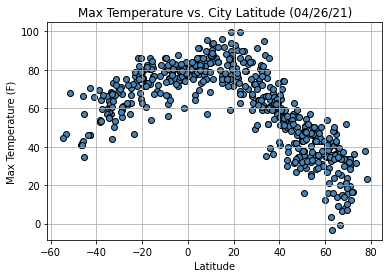

In [66]:
x_axis = clean_city_data["Lat"]
high_temp = clean_city_data["Max Temp"]

plt.scatter(x_axis, high_temp, marker="o", facecolors="steelblue", edgecolors="black")
plt.title("Max Temperature vs. City Latitude (04/26/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("output_data/fig1.png")

plt.show()


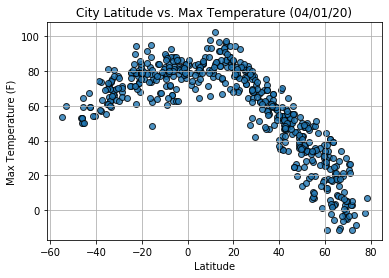

## Latitude vs. Humidity Plot

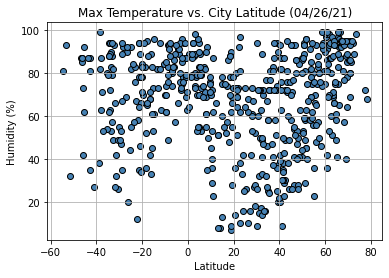

In [67]:
x_axis = clean_city_data["Lat"]
humid = clean_city_data["Humidity"]

plt.scatter(x_axis, humid, marker="o", facecolors="steelblue", edgecolors="black")
plt.title("Max Temperature vs. City Latitude (04/26/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("output_data/fig2.png")

plt.show()

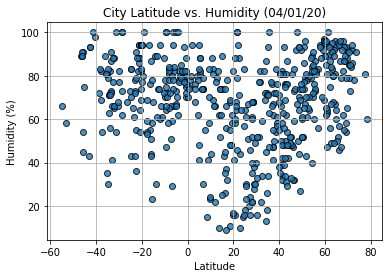

## Latitude vs. Cloudiness Plot

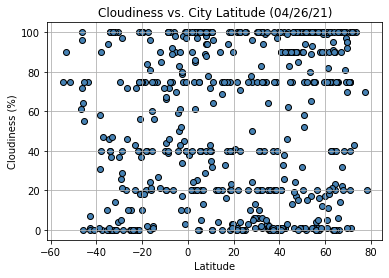

In [70]:
x_axis = clean_city_data["Lat"]
y_axis = clean_city_data["Cloudiness"]

plt.scatter(x_axis, y_axis, marker="o", facecolors="steelblue", edgecolors="black")
plt.title("Cloudiness vs. City Latitude (04/26/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("output_data/fig3.png")

plt.show()

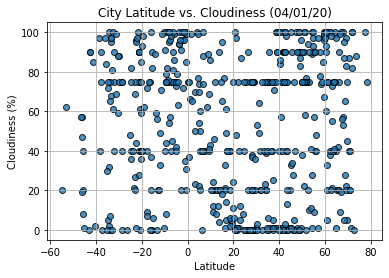

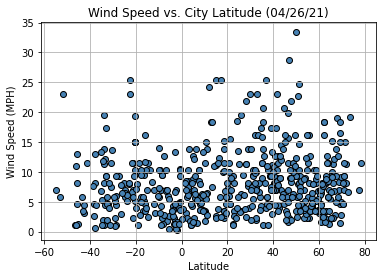

In [71]:
x_axis = clean_city_data["Lat"]
y_axis = clean_city_data["Wind Speed"]

plt.scatter(x_axis, y_axis, marker="o", facecolors="steelblue", edgecolors="black")
plt.title("Wind Speed vs. City Latitude (04/26/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.grid()
plt.savefig("output_data/fig4.png")

plt.show()

## Latitude vs. Wind Speed Plot

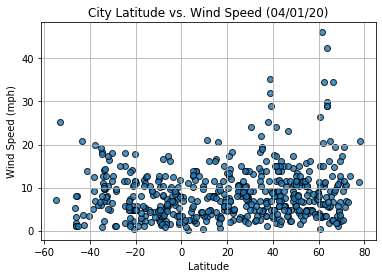

## Linear Regression

In [90]:
northern_hem = clean_city_data.loc[clean_city_data["Lat"] >= 0]
#northern_hem.count()
southern_hem = clean_city_data.loc[clean_city_data["Lat"] < 0]
southern_hem.count()

City Name     167
Lat           167
Long          167
Max Temp      167
Humidity      167
Cloudiness    167
Wind Speed    167
Country       167
Date          167
dtype: int64

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7636016693617921


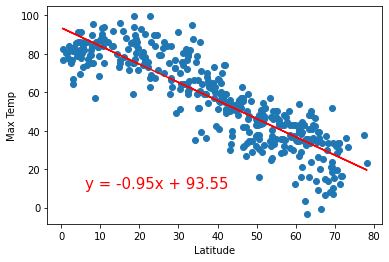

In [81]:
x_values = northern_hem['Lat']
y_values = northern_hem["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.46937863826630627


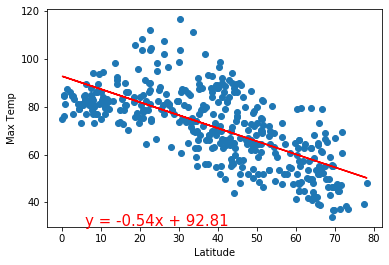

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5304940705154705


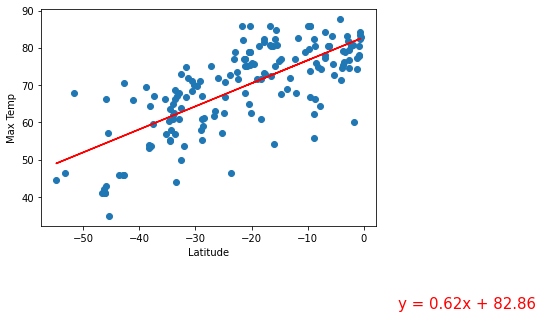

In [92]:
x_values = southern_hem['Lat']
y_values = southern_hem["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red", annotation_clip=False)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue**2}")
plt.show()

In [91]:
print(line_eq)

y = 0.01x + 7.86


The r-value is: 0.6082708688906918


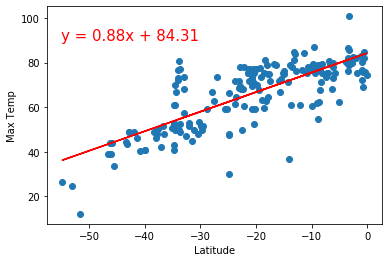

 Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.04662461161435238


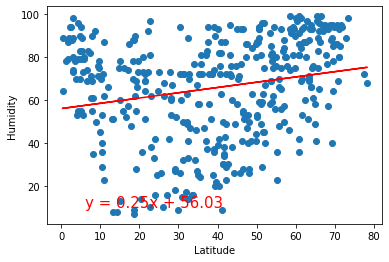

In [85]:
x_values = northern_hem['Lat']
y_values = northern_hem["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.000543987878808455


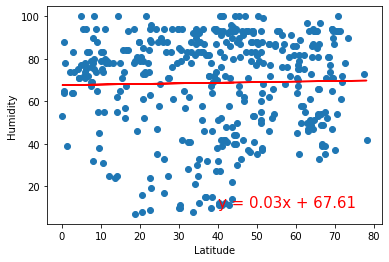

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.034913000943904204


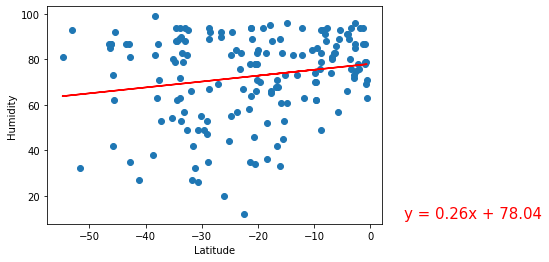

In [93]:
x_values = southern_hem['Lat']
y_values = southern_hem["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red", annotation_clip=False)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.014985174297345524


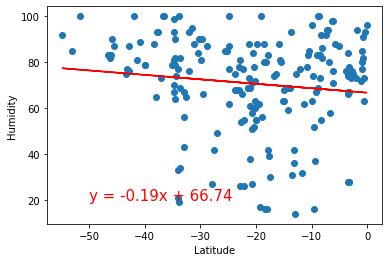

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.014998832383298038


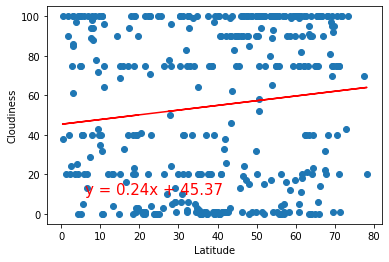

In [88]:
x_values = northern_hem['Lat']
y_values = northern_hem["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.0020898727664228514


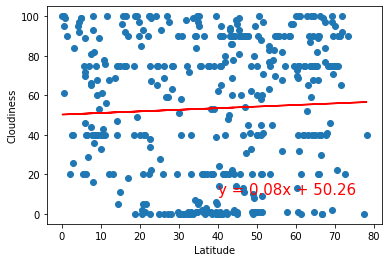

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.040776183151465105


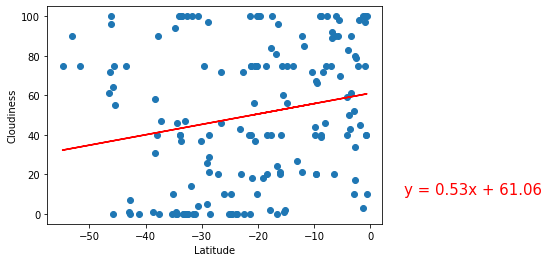

In [94]:
x_values = southern_hem['Lat']
y_values = southern_hem["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red", annotation_clip=False)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.0035263772085582894


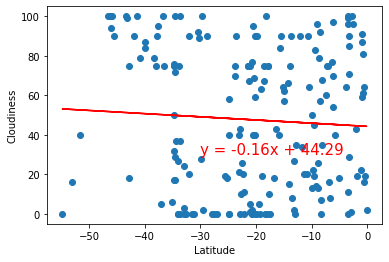

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0020863909875037585


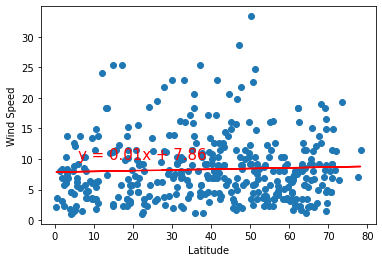

In [89]:
x_values = northern_hem['Lat']
y_values = northern_hem["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.014305174499738942


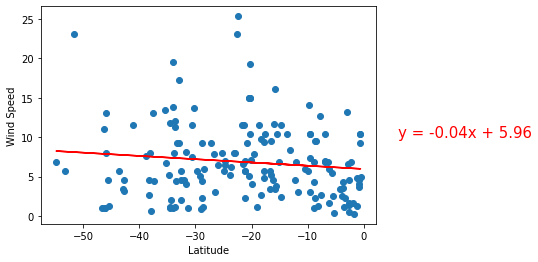

In [95]:
x_values = southern_hem['Lat']
y_values = southern_hem["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red", annotation_clip=False)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.017128274759839232


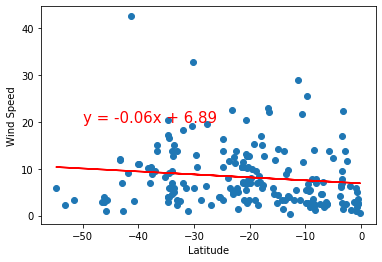